# Tarefa 4 - Redes Neurais

Disciplina de Introdução ao Aprendizado de Máquina - 2024.1

Professor: João Carlos Pereira da Silva

Aluno: Manoel Marcelo da Silva (121088349)

In [312]:
# Bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from graphviz import Graph

In [301]:
# Importando o dataset

iris = pd.read_csv('iris.csv')
iris.head()

,sepalLengthInCM,sepalWidthInCM,petalLengthInCM,petalWidthInCM,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [302]:
# Aplicando StandardScaler para normalizar os dados de entrada

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris[['sepalLengthInCM', 'sepalWidthInCM', 'petalLengthInCM', 'petalWidthInCM']] = scaler.fit_transform(iris[['sepalLengthInCM', 'sepalWidthInCM', 'petalLengthInCM', 'petalWidthInCM']])
iris.head()

,sepalLengthInCM,sepalWidthInCM,petalLengthInCM,petalWidthInCM,target
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


In [303]:
# Separando o dataset em 80% para treino e 20% para teste de forma balanceada

iris_train, iris_test = train_test_split(iris, test_size=0.2, stratify=iris['target'])

# Mostrando o tamanho dos datasets

print('Tamanho do dataset de treino:', iris_train.shape)
print('Tamanho do dataset de teste:', iris_test.shape)

Tamanho do dataset de treino: (120, 5)
Tamanho do dataset de teste: (30, 5)


In [304]:
iris_train.head()

,sepalLengthInCM,sepalWidthInCM,petalLengthInCM,petalWidthInCM,target
77,1.038005,-0.124958,0.705893,0.659118,Iris-versicolor
52,1.280340,0.106445,0.649027,0.396172,Iris-versicolor
64,-0.294842,-0.356361,-0.090227,0.133226,Iris-versicolor
58,0.916837,-0.356361,0.478430,0.133226,Iris-versicolor
36,-0.416010,1.032057,-1.398138,-1.312977,Iris-setosa


In [305]:
iris_test.head()

,sepalLengthInCM,sepalWidthInCM,petalLengthInCM,petalWidthInCM,target
9,-1.143017,0.106445,-1.284407,-1.444450,Iris-setosa
12,-1.264185,-0.124958,-1.341272,-1.444450,Iris-setosa
93,-1.021849,-1.744778,-0.260824,-0.261193,Iris-versicolor
69,-0.294842,-1.281972,0.080370,-0.129720,Iris-versicolor
31,-0.537178,0.800654,-1.284407,-1.050031,Iris-setosa


## Analisando Arquiteturas de Redes Neurais

In [327]:
layer = (10,)
iterations = 1000

### ReLU

K-fold nº: 1
Acurácia de Teste: 0.9583333333333334
Acuracia de Treino: 0.96875
Matriz de confusão:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


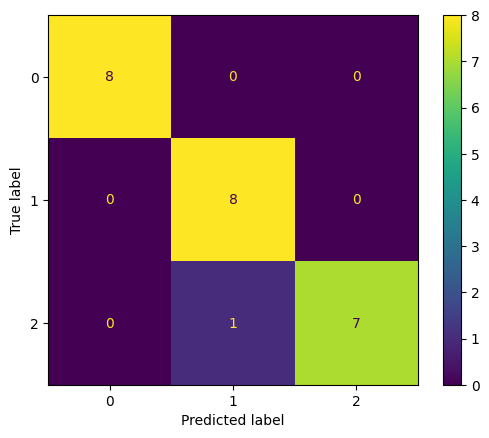

--------------------------------------------------
K-fold nº: 2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia de Teste: 0.9583333333333334
Acuracia de Treino: 0.9479166666666666
Matriz de confusão:


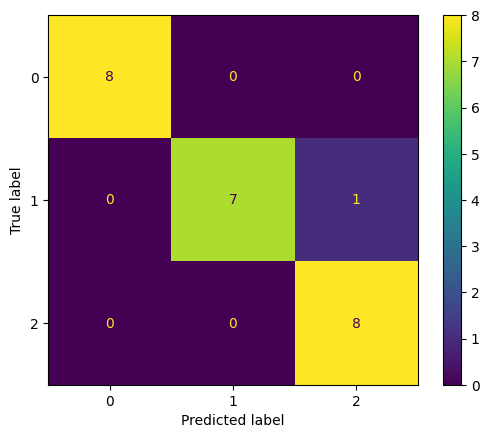

--------------------------------------------------
K-fold nº: 3
Acurácia de Teste: 0.9166666666666666
Acuracia de Treino: 0.8125
Matriz de confusão:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


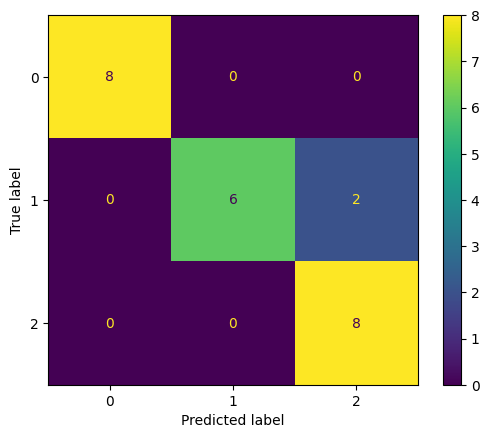

--------------------------------------------------
K-fold nº: 4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia de Teste: 1.0
Acuracia de Treino: 0.9375
Matriz de confusão:


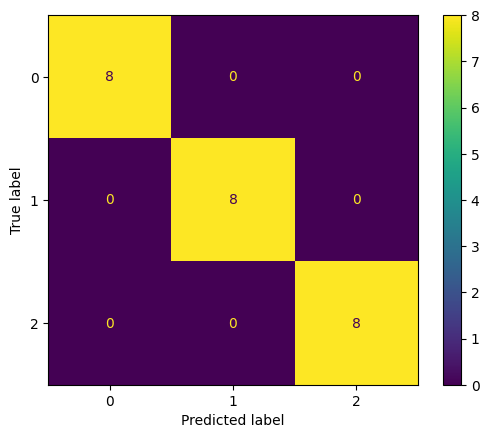

--------------------------------------------------
K-fold nº: 5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia de Teste: 0.9583333333333334
Acuracia de Treino: 0.96875
Matriz de confusão:


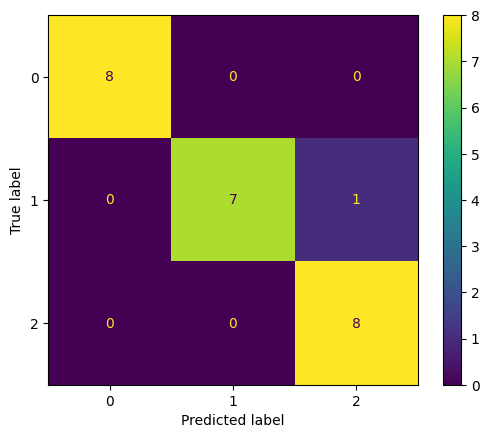

--------------------------------------------------


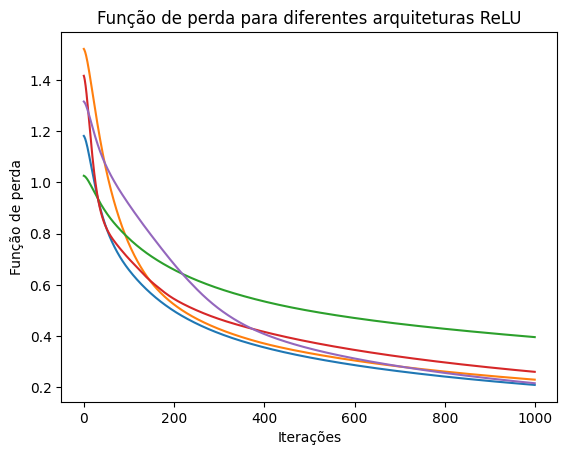

In [336]:
# K-fold cross-validation com 5 folds para encontrar várias arquiteturas de rede neural

kf = StratifiedKFold(n_splits=5, shuffle=True) # Usar StratifiedKFold para manter a proporção de classes? 
i = 1
loss_relu = []

for train_index, test_index in kf.split(iris_train, iris_train['target']):
    print('K-fold nº:', i)
    i += 1

    # print('Tamanho do dataset de treino:', iris_train.iloc[train_index].shape)
    # print('Tamanho do dataset de teste:', iris_train.iloc[test_index].shape)
    
    X_train = iris_train.iloc[train_index][['sepalLengthInCM', 'sepalWidthInCM', 'petalLengthInCM', 'petalWidthInCM']]
    y_train = iris_train.iloc[train_index]['target']

    X_test = iris_train.iloc[test_index][['sepalLengthInCM', 'sepalWidthInCM', 'petalLengthInCM', 'petalWidthInCM']]
    y_test = iris_train.iloc[test_index]['target']

    # Treinando o modelo de rede neural

    mlp = MLPClassifier(activation = 'relu', solver='sgd', hidden_layer_sizes=layer, max_iter=iterations)
    mlp.fit(X_train, y_train)

    # Testando o modelo

    y_pred = mlp.predict(X_test)
    print('Acurácia de Teste:', accuracy_score(y_test, y_pred))
    print('Acuracia de Treino:', mlp.score(X_train, y_train))
    
    print('Matriz de confusão:')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    # print('Pesos da rede neural:')
    # for i, w in enumerate(mlp.coefs_):
    #     print(f'Camada {i}: {w}')
    #     print

    # print('Gráfico da função de perda:')
    # plt.plot(mlp.loss_curve_)
    # plt.show()
    
    loss_relu.append(mlp.loss_curve_)
    
    print('-'*50)

# Grafico da função de perda
for l in loss_relu:
    plt.plot(l)
plt.xlabel('Iterações')
plt.ylabel('Função de perda')
plt.title('Função de perda para diferentes arquiteturas ReLU')
plt.show()


### Logistic

K-fold nº: 1
Acurácia de Teste: 0.7916666666666666
Acuracia de Treino: 0.8229166666666666
Matriz de confusão:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


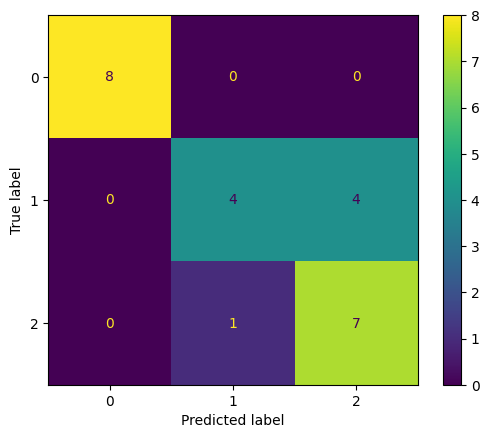

--------------------------------------------------
K-fold nº: 2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia de Teste: 0.875
Acuracia de Treino: 0.8229166666666666
Matriz de confusão:


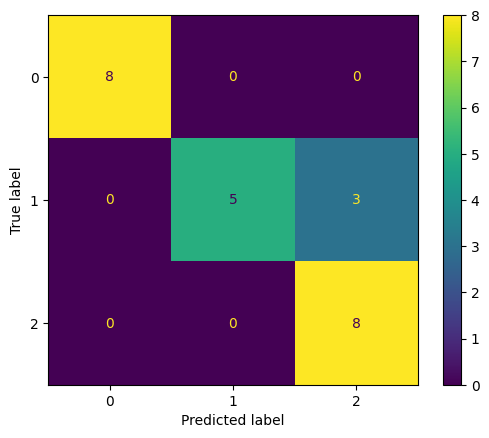

--------------------------------------------------
K-fold nº: 3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia de Teste: 0.7916666666666666
Acuracia de Treino: 0.84375
Matriz de confusão:


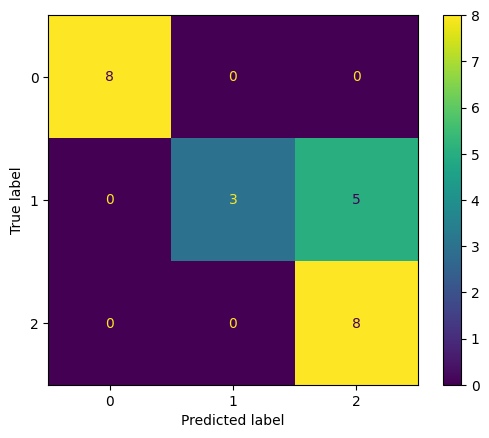

--------------------------------------------------
K-fold nº: 4
Acurácia de Teste: 0.875
Acuracia de Treino: 0.8333333333333334
Matriz de confusão:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


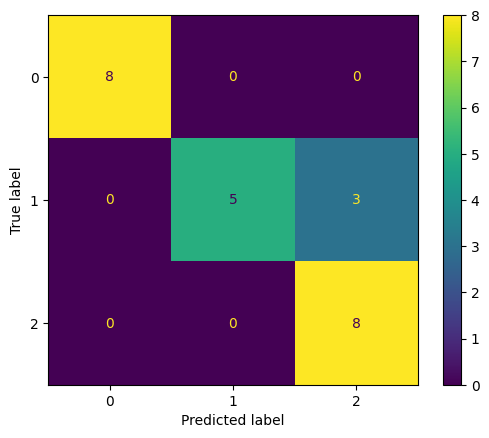

--------------------------------------------------
K-fold nº: 5
Acurácia de Teste: 0.8333333333333334
Acuracia de Treino: 0.875
Matriz de confusão:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


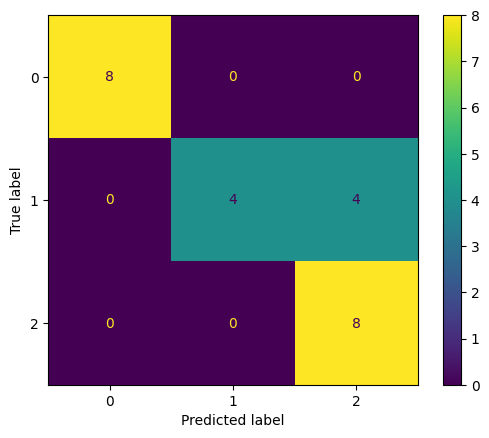

--------------------------------------------------


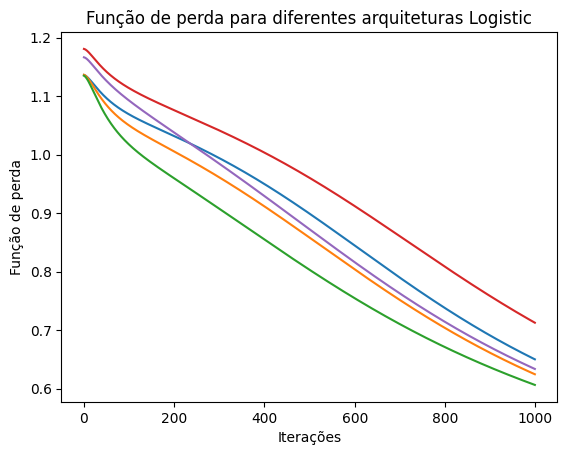

In [337]:
# K-fold cross-validation com 5 folds para encontrar várias arquiteturas de rede neural

kf = StratifiedKFold(n_splits=5, shuffle=True) # Usar StratifiedKFold para manter a proporção de classes? 
i = 1
loss_log = []

for train_index, test_index in kf.split(iris_train, iris_train['target']):
    print('K-fold nº:', i)
    i += 1

    # print('Tamanho do dataset de treino:', iris_train.iloc[train_index].shape)
    # print('Tamanho do dataset de teste:', iris_train.iloc[test_index].shape)
    
    X_train = iris_train.iloc[train_index][['sepalLengthInCM', 'sepalWidthInCM', 'petalLengthInCM', 'petalWidthInCM']]
    y_train = iris_train.iloc[train_index]['target']

    X_test = iris_train.iloc[test_index][['sepalLengthInCM', 'sepalWidthInCM', 'petalLengthInCM', 'petalWidthInCM']]
    y_test = iris_train.iloc[test_index]['target']

    # Treinando o modelo de rede neural

    mlp = MLPClassifier(activation = 'logistic', solver='sgd', hidden_layer_sizes=layer, max_iter=iterations)
    mlp.fit(X_train, y_train)

    # Testando o modelo

    y_pred = mlp.predict(X_test)
    print('Acurácia de Teste:', accuracy_score(y_test, y_pred))
    print('Acuracia de Treino:', mlp.score(X_train, y_train))
    
    print('Matriz de confusão:')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    # print('Pesos da rede neural:')
    # for i, w in enumerate(mlp.coefs_):
    #     print(f'Camada {i}: {w}')
    #     print

    # print('Gráfico da função de perda:')
    # plt.plot(mlp.loss_curve_)
    # plt.show()
    
    loss_log.append(mlp.loss_curve_)
    
    print('-'*50)

# Grafico da função de perda
for l in loss_log:
    plt.plot(l)
plt.xlabel('Iterações')
plt.ylabel('Função de perda')
plt.title('Função de perda para diferentes arquiteturas Logistic')
plt.show()



### Tanh

K-fold nº: 1
Acurácia de Teste: 0.9583333333333334
Acuracia de Treino: 0.9375
Matriz de confusão:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


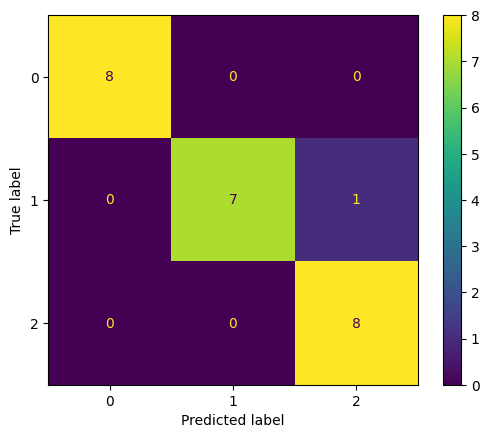

--------------------------------------------------
K-fold nº: 2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia de Teste: 0.9583333333333334
Acuracia de Treino: 0.9479166666666666
Matriz de confusão:


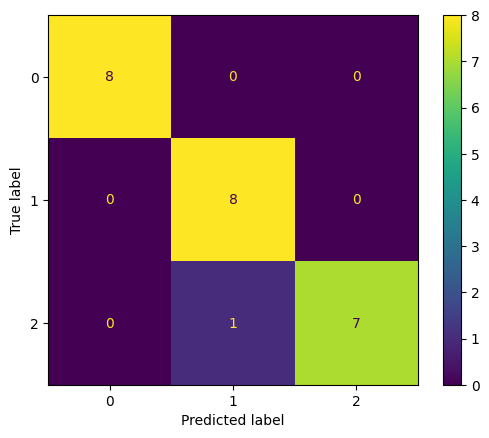

--------------------------------------------------
K-fold nº: 3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia de Teste: 0.9583333333333334
Acuracia de Treino: 0.9270833333333334
Matriz de confusão:


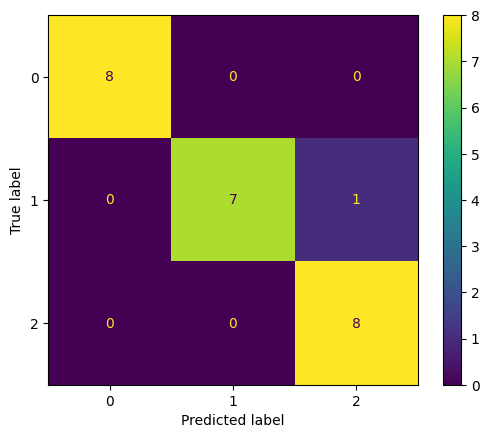

--------------------------------------------------
K-fold nº: 4
Acurácia de Teste: 0.875
Acuracia de Treino: 0.96875
Matriz de confusão:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


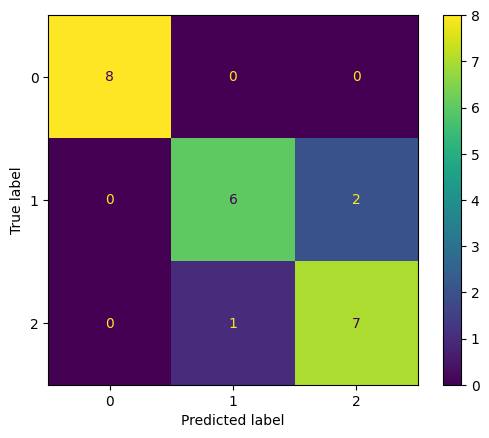

--------------------------------------------------
K-fold nº: 5
Acurácia de Teste: 1.0
Acuracia de Treino: 0.9479166666666666
Matriz de confusão:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


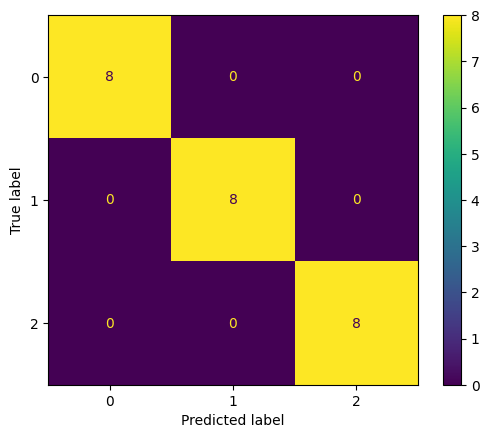

--------------------------------------------------


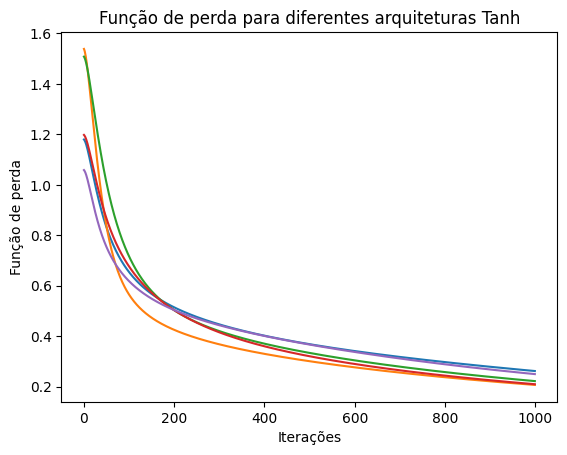

In [338]:
# K-fold cross-validation com 5 folds para encontrar várias arquiteturas de rede neural

kf = StratifiedKFold(n_splits=5, shuffle=True) # Usar StratifiedKFold para manter a proporção de classes? 
i = 1
loss_tanh = []

for train_index, test_index in kf.split(iris_train, iris_train['target']):
    print('K-fold nº:', i)
    i += 1

    # print('Tamanho do dataset de treino:', iris_train.iloc[train_index].shape)
    # print('Tamanho do dataset de teste:', iris_train.iloc[test_index].shape)
    
    X_train = iris_train.iloc[train_index][['sepalLengthInCM', 'sepalWidthInCM', 'petalLengthInCM', 'petalWidthInCM']]
    y_train = iris_train.iloc[train_index]['target']

    X_test = iris_train.iloc[test_index][['sepalLengthInCM', 'sepalWidthInCM', 'petalLengthInCM', 'petalWidthInCM']]
    y_test = iris_train.iloc[test_index]['target']

    # Treinando o modelo de rede neural

    mlp = MLPClassifier(activation = 'tanh', solver='sgd', hidden_layer_sizes=layer, max_iter=iterations)
    mlp.fit(X_train, y_train)

    # Testando o modelo

    y_pred = mlp.predict(X_test)
    print('Acurácia de Teste:', accuracy_score(y_test, y_pred))
    print('Acuracia de Treino:', mlp.score(X_train, y_train))
    
    print('Matriz de confusão:')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    # print('Pesos da rede neural:')
    # for i, w in enumerate(mlp.coefs_):
    #     print(f'Camada {i}: {w}')
    #     print

    # print('Gráfico da função de perda:')
    # plt.plot(mlp.loss_curve_)
    # plt.show()
    
    loss_tanh.append(mlp.loss_curve_)
    
    print('-'*50)

# Grafico da função de perda
for l in loss_tanh:
    plt.plot(l)
plt.xlabel('Iterações')
plt.ylabel('Função de perda')
plt.title('Função de perda para diferentes arquiteturas Tanh')
plt.show()


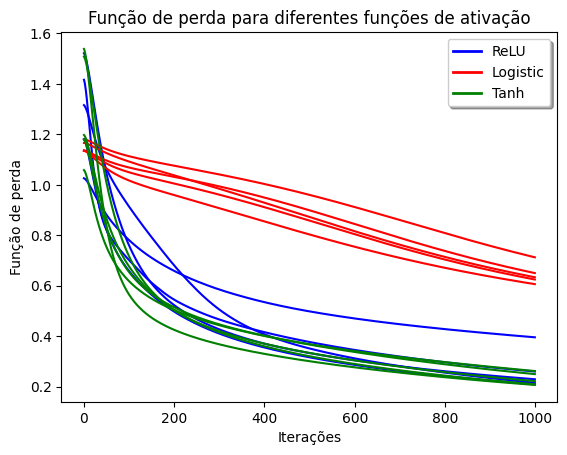

In [343]:
# Comparando as funções de perda para as diferentes funções de ativação
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color='blue', lw=2),
            Line2D([0], [0], color='red', lw=2), 
            Line2D([0], [0], color='green', lw=2)]

for l in loss_relu:
    plt.plot(l, color='blue')
for l in loss_log:
    plt.plot(l, color='red')
for l in loss_tanh:
    plt.plot(l, color='green')
plt.xlabel('Iterações')
plt.ylabel('Função de perda')
plt.title('Função de perda para diferentes funções de ativação')
plt.legend(custom_lines, ['ReLU', 'Logistic', 'Tanh'], loc='upper right', fancybox=True, shadow=True, ncol=1, )

plt.show()


### Conclusão
Percebemos que o modelo com a função de ativação ReLU e TanH tiveram um desempenho melhor que o modelo com a função de ativação Logistic, porém entre elas a função de ativação ReLU obteve um desempenho melhor com menos neurônios na camada oculta e com menos iterações e com mais consistência.

Iremos utilizar o modelo com a função de ativação ReLU com 10 neurônios na camada oculta.

## Aplicando o modelo escolhido

Acurácia de Teste: 0.9666666666666667
Acuracia de Treino: 0.9416666666666667
Matriz de confusão:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


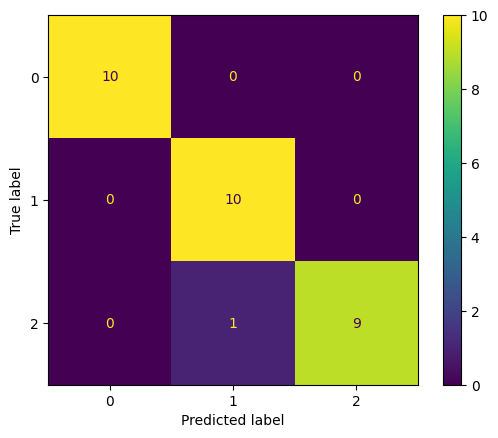

Pesos da rede neural:
Camada 0: [[ 0.14127174 -0.0929434  -0.67476032 -0.53103098 -0.27617574  0.05318873
   0.11821076  0.49526206  0.3535633   0.24726402]
 [ 0.51200401 -0.48541649  0.71847934  0.26492686  0.38178586 -0.42099021
  -0.50250163 -0.00505062 -0.7459849  -0.4617205 ]
 [ 0.38139427 -0.06602707  0.00446425 -0.8918653   0.24709385  1.14605241
  -0.45016252 -0.3711408  -0.59655421 -0.45846889]
 [ 0.60040102  0.32035983 -0.64529598 -0.65139204  0.05613129  0.43106639
   0.53229005  0.24606692  0.01528688 -0.56339808]]

Camada 1: [[ 0.39193102 -0.50845158  0.71343188]
 [ 0.28167239  0.00495816  0.40120972]
 [ 0.69789276 -0.11855575 -0.73011395]
 [ 0.75230293 -0.95511711  0.01504887]
 [-0.16742331 -0.11261048  0.15001719]
 [-0.90258412 -0.2124849   0.94253172]
 [ 0.25726223  0.28773424  0.38948083]
 [-0.38702901  0.7830325  -0.30041818]
 [-0.67703091  0.00191898 -0.71647525]
 [-0.11196138  0.09211555 -1.11487097]]

Gráfico da função de perda:


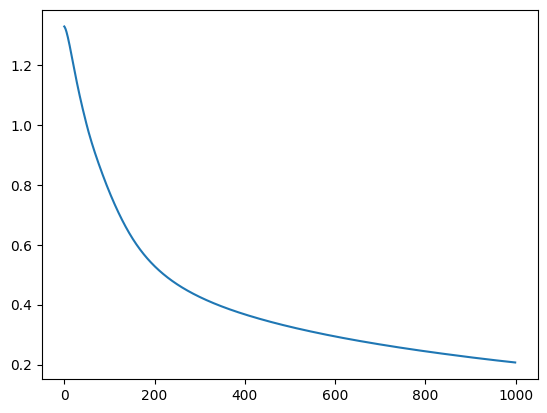

In [344]:
final = MLPClassifier(activation = 'relu', solver='sgd', hidden_layer_sizes=layer, max_iter=iterations)

X_train = iris_train[['sepalLengthInCM', 'sepalWidthInCM', 'petalLengthInCM', 'petalWidthInCM']]
y_train = iris_train['target']

X_test = iris_test[['sepalLengthInCM', 'sepalWidthInCM', 'petalLengthInCM', 'petalWidthInCM']]
y_test = iris_test['target']

final.fit(X_train, y_train)

y_pred = final.predict(X_test)
print('Acurácia de Teste:', accuracy_score(y_test, y_pred))
print('Acuracia de Treino:', final.score(X_train, y_train))

print('Matriz de confusão:')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('Pesos da rede neural:')
for i, w in enumerate(final.coefs_):
    print(f'Camada {i}: {w}')
    print()

print('Gráfico da função de perda:')
plt.plot(final.loss_curve_)


In [325]:
# Desenhar diagrama da rede neural

graph = Graph(directory='graphs', format='png',
              graph_attr=dict(ranksep='2', rankdir='LR', color='white', splines='line'),
              node_attr=dict(label='', shape='circle', width='0.1'),
              edge_attr=dict(color='black'))

for i, w in enumerate(final.coefs_):
    for j in range(w.shape[0]):
        for k in range(w.shape[1]):
            graph.edge(f'Camada {i} Neurônio {j}', f'Camada {i+1} Neurônio {k}')

graph.render('iris')
graph.view()


'graphs/iris.png'